# Project

#### Applied Statistics Project Notebook

In [1]:
#Imports

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### 1. Download and save the dataset

In [2]:
# import and save as a CSV file
URL = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
FILENAME = 'data/plant_growth.csv'
# load into pandas dataframe
df = pd.read_csv(URL)

# export to data folder
df.to_csv(FILENAME, sep=',', index=False, encoding='utf-8')

### 2. Describe the data set

The PlantGrowth dataset in R is a simple and commonly used dataset for illustrating statistical analysis. It contains data from an experiment on the effect of different treatments on the growth of plants.

The dataset is a built-in dataset in R and contains results from an experiment designed to compare the yields (measured by the dried weight of plants) obtained under a control condition and two different treatment conditions[[1]](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth)[[2]](https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis).

##### Format
The dataset is a data frame with 30 observations on 2 variables:
- `weight`: Numeric, representing the dried weight of the plants.
- `group`: Factor with three levels (`ctrl`, `trt1`, `trt2`), to show which treatment group each plant belongs to[[2]](https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis).

##### Usage
It is often used for practicing data analysis and visualization techniques in statistics, such as performing ANOVA (Analysis of Variance) to determine if there are significant differences between the groups and it is also used as basis for examining the impact of different treatments on plant growth[[1]](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth).

[1]https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth

[2]https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis

In [3]:
# run describe on the data set
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [4]:
# split dataset according to groups

df_ctrl = df[df['group'] == 'ctrl']
df_trt1 = df[df['group'] == 'trt1']
df_trt2 = df[df['group'] == 'trt2']

In [5]:
# run describe on each new data set

print(f"Control group:\n {df_ctrl.describe()}\nTreatment 1 Group:\n {df_trt1.describe()}\nTreatment 2 Group:\n {df_trt2.describe()}")


Control group:
        rownames     weight
count  10.00000  10.000000
mean    5.50000   5.032000
std     3.02765   0.583091
min     1.00000   4.170000
25%     3.25000   4.550000
50%     5.50000   5.155000
75%     7.75000   5.292500
max    10.00000   6.110000
Treatment 1 Group:
        rownames     weight
count  10.00000  10.000000
mean   15.50000   4.661000
std     3.02765   0.793676
min    11.00000   3.590000
25%    13.25000   4.207500
50%    15.50000   4.550000
75%    17.75000   4.870000
max    20.00000   6.030000
Treatment 2 Group:
        rownames     weight
count  10.00000  10.000000
mean   25.50000   5.526000
std     3.02765   0.442573
min    21.00000   4.920000
25%    23.25000   5.267500
50%    25.50000   5.435000
75%    27.75000   5.735000
max    30.00000   6.310000


In [6]:
# convert to numpy arrays
ctrl = df_ctrl.to_numpy()
trt1 = df_trt1.to_numpy()
trt2 = df_trt2.to_numpy()

In [7]:
df_weights = pd.concat([df_ctrl['weight'], df_trt1['weight'], df_trt2['weight']], axis=1, keys=['ctrl', 'trt1', 'trt2'])

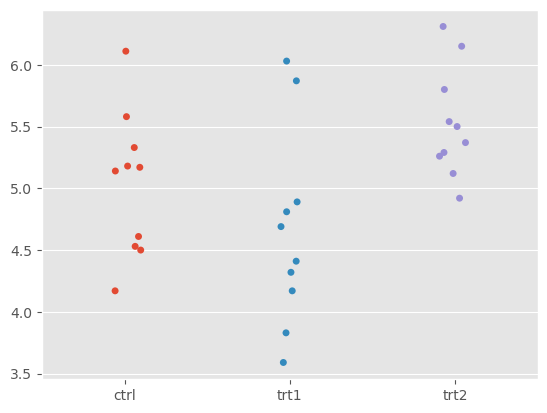

In [8]:
# Create a strip plot.
sns.stripplot(data=df_weights);

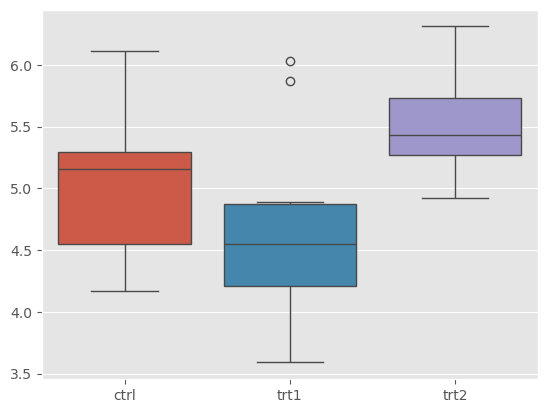

In [9]:
# Box plot.
sns.boxplot(data=df_weights);

### 3. Describe what a t-test is, how it works, and what the assumptions are.

A t-test also known as Student's t test is a statistical test used to determine if there is a significant difference between the means of two groups[[3]](https://journals.lww.com/aoca/fulltext/2019/22040/application_of_student_s_t_test,_analysis_of.11.aspx). It helps evaluate whether observed differences in sample means are likely to have occurred by chance, or if they reflect real differences in the populations being compared. The test is particularly useful when the sample size is small, and the population standard deviation is unknown.

There are different types of t-tests depending on the situation:

1. One-sample t-test: Compares the mean of a single sample to a known value or theoretical population mean.
2. Independent two-sample t-test: Compares the means of two **independent groups** (e.g., treatment vs. control).
3. Paired t-test: Compares the means of two **related groups** (e.g., before and after a treatment on the same individuals)[[3]](https://journals.lww.com/aoca/fulltext/2019/22040/application_of_student_s_t_test,_analysis_of.11.aspx).

##### How it works

The formula for the independent two-sample t-test is:

$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

Where:
- $\bar{X}_1$ and $\bar{X}_2$  are the sample means.
- $s_1^2$ and $s_2^2$ are the sample variances.
- $n_1$ and $n_2$ are the sample sizes.

###### Interpretation
- **t-value**: Indicates the ratio of the difference between the group means to the variability of the groups.
- **p-value**: Shows the probability that the observed difference occurred by chance. A p-value less than 0.05 typically indicates statistical significance.
- **Degrees of freedom (df)**: Related to the sample size and used to determine the critical value from the t-distribution.

##### Example
Suppose you want to test if a new drug affects blood pressure. You measure the blood pressure of 30 patients before and after administering the drug. You can use a paired sample t-test to compare the means of the two measurements.


##### Assumptions
For a t-test to be valid, the following assumptions should be met:
- The data should be approximately normally distributed.
- The variances of the two groups should be equal (homogeneity of variance).
- The data should be independent.

#### References
[1] "An Introduction to t Tests," Scribbr. [Online]. Available: https://www.scribbr.com/statistics/t-test/. [Accessed: 09-Dec-2024].

[2] "T Test (Student’s T-Test)," Statistics How To. [Online]. Available: https://www.statisticshowto.com/probability-and-statistics/t-test/. [Accessed: 09-Dec-2024].

[3] "T-Test," Investopedia. [Online]. Available: https://www.investopedia.com/terms/t/t-test.asp. [Accessed: 09-Dec-2024].

### 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

### 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

### 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.